In [1]:
# Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels matrix)
y = heart_disease['target']

In [4]:
# 2. Choose the right model and the right hyperparameters
from sklearn.ensemble import RandomForestClassifier
# Classifier / model
clf = RandomForestClassifier()

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # this test_size means 80% of the data would be used for train

In [6]:
clf.fit(X_train, y_train); # Find patterns in the training data

In [7]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2


In [8]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [9]:
y_test

142    1
74     1
32     1
82     1
157    1
      ..
185    0
213    0
265    0
154    1
33     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test) # 81% accuracy, 4/5 predictions correct on the test data

0.8688524590163934

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[22,  3],
       [ 5, 31]])

In [14]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [15]:
# 5. Improve the model
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f'Model accuracy on test set: {clf.score(X_test,y_test) * 100:.2f}%')
    print('')

Trying model with 10 estimators...
Model accuracy on test set: 72.13%

Trying model with 20 estimators...
Model accuracy on test set: 81.97%

Trying model with 30 estimators...
Model accuracy on test set: 85.25%

Trying model with 40 estimators...
Model accuracy on test set: 86.89%

Trying model with 50 estimators...
Model accuracy on test set: 83.61%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 85.25%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [16]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open('random_forst_model_1.pkl', 'wb')) # wb = write binary

In [17]:
loaded_model = pickle.load(open('random_forst_model_1.pkl', 'rb')) # rb = read binary

loaded_model.score(X_test,y_test)

0.8032786885245902

In [18]:
# 1. Getting our data ready to be used with ML

**Three main things we have to do:**
1. Split the data into features and labels (Usually 'X' and 'y').
2. Filling or disregarding missing values.
3. Converting non-numerical values to numerical values (Feature encoding).

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Create features matrix
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
# Create labels matrix
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape[0] * 0.8 # X_train has the 80% of samples

242.4

In [25]:
X.shape

(303, 13)

In [26]:
len(heart_disease)

303

In [27]:
### Making sure everything is numerical

In [28]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
#car_sales['Price'] = car_sales['Price'].str.replace(r'[^0-9]', '', regex=True)
# car_sales.head()

In [32]:
car_sales['Price'] = car_sales['Price'].astype(int)

In [33]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [34]:
# Split into features matrix 
X = car_sales.drop('Price', axis=1)
# Split into labels matrix
y = car_sales['Price']

In [35]:
# Split into training and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Build ML Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [37]:
### 1. Convert strings to numbers

In [38]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [39]:
car_sales['Doors'].value_counts() # Different n of doors can refer to different categories

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)], 
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [41]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [42]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [43]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
model.score(X_test, y_test)

0.3235867221569877

### 2. What if there were missing values?

1. Fill them with some value.
2. Remove the samples with missing data altogether.

In [45]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum() # Missing values in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Create features (X) and labels (y) matrix
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [48]:
# Convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)], 
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [49]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [50]:
len(car_sales_missing)

1000

In [51]:
car_sales_missing['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [52]:
### Option 1. Fill missing data with Pandas

In [53]:
# Fill 'Make', 'Colour', 'Odometer (KM)' and 'Doors' column
car_sales_missing.fillna({
    'Make': 'missing',
    'Colour': 'missing',
    'Odometer (KM)': car_sales_missing['Odometer (KM)'].mean(),
    'Doors': 4
}, inplace=True)

In [54]:
car_sales_missing.isna().sum() # Now there should be no missing values

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [55]:
### Option 2. Remove missing data with Pandas
car_sales_missing.dropna(inplace=True)

In [56]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [57]:
len(car_sales_missing)

950

In [58]:
# Create features (X) and labels (y) matrix
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [59]:
# Convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)], 
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

### 3. Choosing the right model/estimator for your problem

- Sklearn refers to ML models, algorithms as estimators.
- Classification problem - predicting a category (heart disease or not)
    - We'll see `clf` (short for classifier) used as a classification estimator
- Regression problem - predicting a number (selling price of a car)

### 3.1 Picking a machine learning model for a regression problem

Using the [california housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [60]:
# Import the california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [61]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
housing_df['target'] = housing['target'] # MedHouseVal is the target name but for practical purposes we'll name it target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
#Import algorithm/estimator (trial and error here)
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = housing_df.drop('target', axis=1)
y= housing_df['target'] # median house price in $100k

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440132

In [64]:
#Import algorithm/estimator (trial and error here)
from sklearn.linear_model import Lasso

# Setup random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = housing_df.drop('target', axis=1)
y= housing_df['target'] # median house price in $100k

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440132

What if `Ridge` model didn't fit our needs?

We could always try a different model/algorithm...

Let's try with an [ensamble model](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) (an ensamble is a combination of smaller models to create more accurate predictions than just a single model)


In [65]:
#Import algorithm/estimator 
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = housing_df.drop('target', axis=1)
y= housing_df['target'] # median house price in $100k

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.806652667101436

### 3.2 Picking a machine learning model for a classification problem

Using the [iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset)

In [66]:
#Import the iris dataset
from sklearn.datasets import load_iris 
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [67]:
# Create a DataFrame based on the iris dataset object
iris_df = pd.DataFrame(iris['data'], columns= iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
# Add the target column to the df
iris_df['target'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
#iris_df.drop('species', axis=1, inplace=True)

In [70]:
# Add a species column to be more readable
#iris_df['type'] = iris['target_names'][iris['target']] # Based on the iris target index display the corresponing target name which is a specie
#iris_df

In [71]:
#iris_df.drop('type', axis=1, inplace=True)

In [72]:
len(iris_df)

150

In [73]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
# Import the model/estimator
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model (on the training set)
clf = RandomForestClassifier()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.9983926868044515

In [75]:
### Another classification problem

In [76]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
len(heart_disease)

303

Trying Linear SVC Based on [Choosing The Right Estimator](https://scikit-learn.org/stable/machine_learning_map.html)

In [78]:
# Import linear svc estimator class 
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data in training and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model and fit it (in training data)\
clf = LinearSVC()
clf.fit(X_train, y_train)

# Check the score of the model
clf.score(X_test, y_test)

0.8688524590163934

In [79]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Trying now random forest classifier

In [80]:
# Import Random forest classifier estimator class 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create features/data (X) and labels/targets (y) matrix
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data in training and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model and fit it (in training data)\
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model
clf.score(X_test, y_test)

0.8524590163934426

## Remember
1. For **structured data**, use ensemble methods.
2. For **unstructured data** use deep learning or transfer learning.

### 4. Fit the model/algorithm on our data to make predictions

- **`X`**: features, data
- **`y`**: labels, targets

**Fitting a model/algorithm** on our data is the process of an algorithm learning the relationship between feature variables and target (label) ones from a dataset

### 4.1 Make predictions using a ML model
There are 2 ways to make predictiosn:
1. `predict()`
2. `predict_proba()`

### 4.2 Making predictions with our model (Classification)

Making predictions with `predict`

In [81]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [82]:
# Use a trained model to predict
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [84]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [85]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_preds)

0.8524590163934426

Making predictions with `predict_proba()`

`predict_proba` returns posabilities of a classification label

In [86]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [87]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

- Using `predict_proba()` returns the probability of each class (in this case 0 or 1) for a given sample,
  while `predict()` returns the most likely class label.

- The label returned by `predict()` is simply the class with the highest probability from the 
`predict_proba()` output.

In [88]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [89]:
heart_disease['target'].value_counts() # Classes of target

target
1    165
0    138
Name: count, dtype: int64

### 4.3 Making predictions with our model (Regression)

In [90]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [91]:
# Import model/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup a random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data into training and test sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [92]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [93]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [94]:
len(y_preds), len(y_test)

(4128, 4128)

In [95]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) # Our predictions are on averga .32 different than the target values

0.32656738464147306

In [96]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

### 5. Evaluating a machine learning model

There are 3 ways to evaluate Scikit-Learn models/estimators:
1. Estimators built-in `score()` method.
2. The `scoring` parameter.
3. Problem-specific metric functions.

### 5.1 Evaluating a score with the `score()` method

In [97]:
# Import model/estimator
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data into training and test sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
# The highest value is 1.0, the lowest is 0.0
clf.score(X_test, y_test)

0.8524590163934426

In [99]:
clf.score(X_train, y_train) # As this was the training set it should be almost perfect score

1.0

### 5.2 Evaluating a score with the `scoring` parameter

In [100]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data into training and test sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [101]:
clf.score(X_test, y_test)

0.8524590163934426

In [102]:
cross_val_score(clf, X, y) # 5 different splits of data

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

![Cross Validation](https://i.imgur.com/8OU8VEq.png)

### Comparing using `score() method` and `scoring` (cross-val) param

In [103]:
# Setup a random seed
np.random.seed(42)

# Using `score()`
single_score = clf.score(X_test, y_test)

# Getting the mean of the 5 `cross_val` scores
cross_val_mean_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
single_score, cross_val_mean_score

(0.8524590163934426, np.float64(0.8248087431693989))

The scoring parameter by default is set to `None`

In [104]:
# cross_val_score = cross_val_score(clf, X, y, scoring=None)

## 5.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification report

**1. Accuracy**

In [105]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Import estimator
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [107]:
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [108]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [109]:
# Based on our features how likely is to predict the target
print(f'Heart dissease classifier cross-validated mean accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart dissease classifier cross-validated mean accuracy: 82.48%


**2. Area under the receiver operating characteristic curve (AUC/ROC)**

- Area under curve (AUC)
- ROC curve

*ROC curves* compare a model's true positive rate (TPR) to its false positive rate (FPR).

- **True positive**: The model predicts 1 when the actual value is 1.
- **False positive**: The model predicts 1 when the actual value is 0.
- **True negative**: The model predicts 0 when the actual value is 0.
- **False negative**: The model predicts 0 when the actual value is 1.

In [110]:
# Import roc curve
from sklearn.metrics import roc_curve
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on our train set)
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [111]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [112]:
# Calculate fpr, tpr and thresholds
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

# Check fpr - false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [113]:
from sklearn.metrics import RocCurveDisplay

rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

RuntimeError: Can not load face (invalid stream operation; error code 0x55)

<Figure size 640x480 with 1 Axes>

In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive) # Max value for area under curve is 1

0.8669181034482759

**3. Confusion Matrix**

A confusion matrix compares a model's predicted labels against the actual labels, revealing where the model is making errors (getting confused).


In [115]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [116]:
# Better way to visualize this
pd.crosstab(y_test, 
            y_preds, 
            rownames=['Actual labels'],
            colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


**As we can see:**
- The bottom left to top right diagonal is where our model is failing
- 24 true negatives, where the predicted label is 0 and the actual label is 0
- 5 false positives, where the predicted label is 1 but the actual label is 0
- 5 false negatives, where the predicted label is 0 but the actual label is 1
- 27 true positives, where the predicted label is 1 and the actual label is 1


In [117]:
(24 + 5 + 5 + 27), len(X_test)

(61, 61)

In [118]:
# How to install a conda package into the current env from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




### Using scikit-learn to visualize confusion matrix

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y);

Error in callback <function _draw_all_if_interactive at 0x0000014A4752FB00> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Can not load face (invalid stream operation; error code 0x55)

RuntimeError: Can not load face (invalid stream operation; error code 0x55)

<Figure size 640x480 with 2 Axes>

In [120]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

Error in callback <function _draw_all_if_interactive at 0x0000014A4752FB00> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Can not load face (invalid stream operation; error code 0x55)

RuntimeError: Can not load face (invalid stream operation; error code 0x55)

<Figure size 640x480 with 2 Axes>

### Using seaborn package to visualize confusion matrix

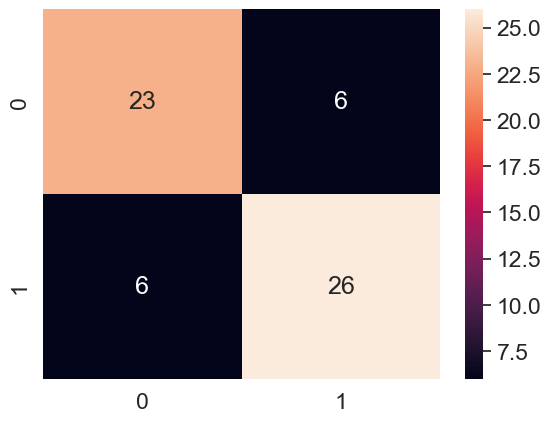

In [121]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plotting it using seaborn
sns.heatmap(conf_mat, annot=True);

**4. Classification Report**

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



![ClassificationReport](https://i.imgur.com/rw7J7pO.png) 

**Classification Metrics Summary:**

- **Accuracy** is a good starting point if all classes are balanced (e.g., the same number of samples are labeled with 0 or 1).
- **Precision** and **recall** become more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.
- The **F1-score** is a combination of precision and recall.

## 5.2.2 Regression model evaluation metrics

1. R-quared (R^2) or Coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**1. R-quared (R^2)**

In [123]:
# Import model/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup a random seed
np.random.seed(42)

# Create features (X) and labels (y) matrix
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data into training and test sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [124]:
model.score(X_test, y_test)

0.806652667101436

In [125]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [126]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [127]:
y_test.mean()

np.float64(2.0550030959302323)

In [128]:
from sklearn.metrics import r2_score

# Fill an array with mean y_test
y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [129]:
r2_score(y_true=y_test,
         y_pred=y_test_mean) # If it predicts the mean it will return 0

0.0

In [130]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

 **2. Mean Absolute Error (MAE)**

 Is the average of the absolute differences between predictions and actual values.
 
 It gives an idea of how wrong the model predictions are.

In [131]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_true=y_test,
                    y_pred=y_preds)

mae # MAE - On average there's a +- 0.3 error on our predictions vs the actual value

0.32656738464147306

In [132]:
# As the data being passed as true is the same as the one passed as predicted theres no room for error obviously
mean_absolute_error(y_true=y_test,
                    y_pred=y_test) 

0.0

In [133]:
df = pd.DataFrame(data={'actual values': y_test,
                        'predicted values': y_preds })

df['differences'] = abs(df['predicted values'] - df['actual values'])

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,0.925110
5723,4.46600,4.834478,0.368478


In [134]:
# MAE using formulas and differences
df['differences'].mean()

np.float64(0.32656738464147306)

 **3. Mean Squared Error (MSE)**

 Is the average of the squared of the erros between actual and predicted values.

In [135]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.25336408094921037

In [136]:
df['squared differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,0.448240,0.200919


In [137]:
# Calculate MSE based on the differences col
squared = np.square(df['differences'])
squared.mean()

np.float64(0.25336408094921037)

### 5.3 Using the `score` parameter

### 5.3.1 For classification metrics

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [141]:
# 5.3.1 Accuracy v1
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)

print(f'The cross validated accuracy is: {np.mean(cv_acc) *100:.2f}%')

The cross validated accuracy is: 82.48%


In [148]:
# 5.3.2 Accuracy v2
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f'The cross validated accuracy is: {np.mean(cv_acc) *100:}%')

The cross validated accuracy is: 82.48087431693989%


In [149]:
# 5.3.3 Precision
np.random.seed(42)

# Cross-validation precision
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='precision')

print(f'The cross validated precision is: {np.mean(cv_acc):}')

The cross validated precision is: 0.8329547346025924


In [150]:
# 5.3.4 Recall
np.random.seed(42)

# Cross-validation precision
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='recall')

print(f'The cross validated recall is: {np.mean(cv_acc):}')

The cross validated recall is: 0.8545454545454545


### 5.3.2 For regression metrics

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor()

# 1. R-squared
cv_r2 = cross_val_score(model, X, y, scoring=None)

np.mean(cv_r2)

np.float64(0.6521550148270838)

In [153]:
cv_r2

array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [160]:
# 2. Mean Squared Error (MSE)
cv_mse = cross_val_score(model, X, y, cv=3,scoring='neg_mean_squared_error')
np.mean(cv_mse)

np.float64(-0.45853501869681806)

In [162]:
cv_mse

array([-0.50968518, -0.32680682, -0.53911306])

In [161]:
# 3. Mean Absolute Error (MAE)
cv_mae = cross_val_score(model, X, y, cv=3,scoring='neg_mean_absolute_error')
np.mean(cv_mae)

np.float64(-0.480355649253876)

In [163]:
cv_mae

array([-0.51092715, -0.42344824, -0.50669155])